Mean Squared Error: 33635210.431178436
R-squared: 0.7833463107364537


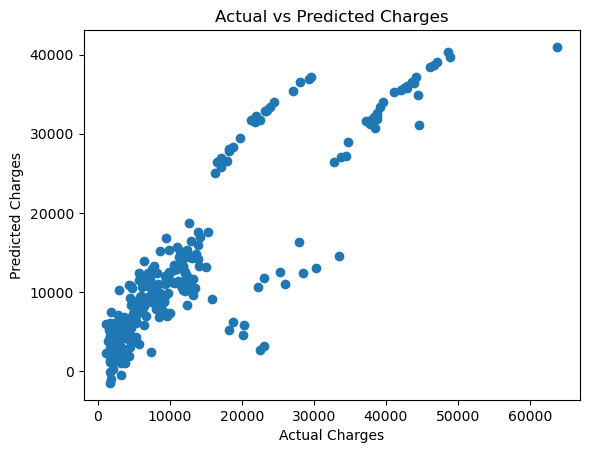

          Coefficient
age       3616.108652
sex         -9.392954
bmi       2028.308579
children   516.662566
smoker    9557.143383
region    -302.387980


In [3]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 2: Load the dataset
# Assuming the dataset is already imported into a DataFrame named 'df'
df = pd.read_csv('Insurance.csv')  # Replace 'your_dataset.csv' with the actual filename if needed

# Step 3: Data exploration
# Display the first few rows of the dataset to understand the structure
df.head()

# Step 4: Check for missing values
# This step is crucial to ensure the data quality before training the model
df.isnull().sum()

# Step 5: Data preprocessing - Encoding categorical variables
# Convert categorical columns ('sex', 'smoker', 'region') into numerical values using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# Step 6: Feature Selection
# Select the independent variables (X) and the dependent variable (y)
X = df.drop('charges', axis=1)  # Dropping the target variable
y = df['charges']  # This is the target variable we want to predict

# Step 7: Train-test split
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Feature Scaling
# Scaling the features is important to bring all variables to a similar scale, especially for regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 9: Model training
# Initialize the Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Model prediction
# Predict the target variable (charges) for the test data
y_pred = model.predict(X_test)

# Step 11: Model evaluation
# Calculate the performance of the model using Mean Squared Error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 12: Visualizing the results
# Plotting a scatter plot to visualize the actual vs predicted charges
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

# Step 13: Coefficients interpretation
# Display the coefficients of the linear regression model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
